# Observations and Insights

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [10]:
# Combine the data into a single dataset #Join based on similar values
combined_df = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID', 'Mouse ID'])
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice 
mice_count = len(combined_df['Mouse ID'].unique())
mice_count 

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse



array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ID = combined_df.set_index(['Mouse ID'])
duplicate_mouse_ID

duplicate_mouse_ID.loc['g989']


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [14]:
#Pulling data from combined_df WITHOUT the duplicated mouse
combined_df.loc[combined_df['Mouse ID'] != 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_df = combined_df.loc[combined_df['Mouse ID'] != 'g989']
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice in the clean DataFrame.
# Change to reflect new df 
new_mice_count = len(clean_df['Mouse ID'].unique())
new_mice_count

248

# Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Groupby drug regimen 
drug_regimen = clean_df.groupby(['Drug Regimen'])

#Set index for DataFrame
# mouse_ID = mouse_metadata.set_index('Drug Regimen')['Mouse ID']
# total_mice = drug_regimen['Mouse ID'].count()

#Calculations
mean = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard_dev = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

mean , median, variance, standard_dev, sem


(Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.320930
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.446266
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Capomulin    24.947764
 Ceftamin     39.290177
 Infubinol    43.128684
 Ketapril     68.553577
 Naftisol     66.173479
 Placebo      61.168083
 Propriva     43.852013
 Ramicane     23.486704
 Stelasyn     59.450562
 Zoniferol    48.533355
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Capomulin    4.994774
 Ceftamin     6.268188
 Infubinol    6.567243
 Ketapril     8.279709
 Na

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_summary = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': standard_dev, 'SEM': sem})
stats_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Using the aggregation method, produce the same summary statistics in a single line
stats_summary_agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
stats_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

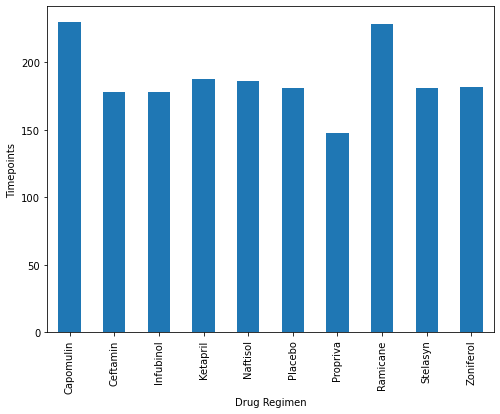

<Figure size 432x288 with 0 Axes>

In [20]:
# #Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.plot().


timepoints = clean_df.groupby('Drug Regimen')['Timepoint'].count() #count (200) or sum (5000)??

timepoint_chart = timepoints.plot(kind='bar', figsize=(8,6))

# Set the xlabel and ylabel
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Timepoints")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Timepoint')

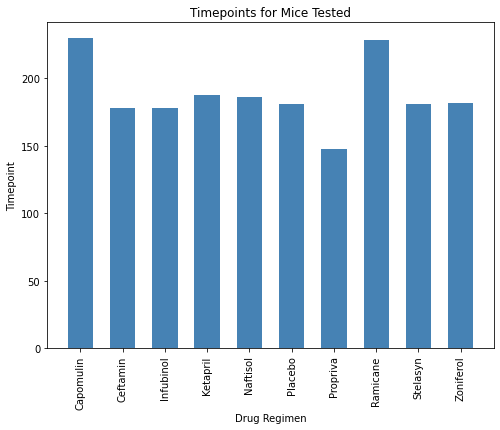

In [102]:
# #Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
timepoints_2 = clean_df.groupby('Drug Regimen')['Timepoint'].count()
x_axis = np.arange(len(timepoints_2))
ticks = [value+0.3 for value in x_axis]


# #Create a list indicating where to write x labels and set figure size
plt.figure(figsize=(8,6))
plt.bar(x_axis, timepoints_2, color='steelblue', alpha=1, align='edge', width=0.6)
plt.xticks(ticks, regimen, rotation='vertical')

# Axis labels and Title
plt.title('Timepoints for Mice Tested')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')


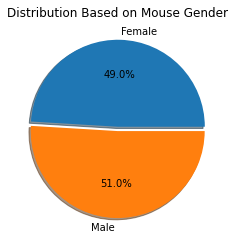

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas.plot().
pie_plot = clean_df.groupby("Sex")
pie_plot

sex = pie_plot['Sex'].count()

pie_chart = sex.plot(kind="pie", explode=(0.05,0), shadow=True, autopct='%1.1f%%', title="Distribution Based on Mouse Gender")
pie_chart.set_xlabel("")
pie_chart.set_ylabel("")

plt.show()
plt.tight_layout()


([<matplotlib.patches.Wedge at 0x7fd4a4d6a460>,
 [Text(0.036089469908307935, 1.1994571897995099, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.021052190779846297, 0.6996833607163808, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

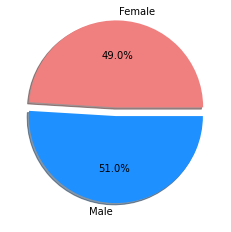

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot_2 = clean_df.groupby("Sex")
pie_plot_2

sex_2 = pie_plot['Sex'].count()

labels = ['Female', 'Male']
colors = ['lightcoral', 'dodgerblue']

plt.pie(sex_2, explode=(0.1,0), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

# Quartiles, Outliers, and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = final_tumor_volume.groupby(['Mouse ID','Drug Regimen']).max('Timepoint').reset_index()
timepoint_max_df = pd.DataFrame(timepoint_max)
timepoint_max_df

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = timepoint_max[['Mouse ID', 'Timepoint']].merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')
last_timepoint_df.head(15)

#this DF showing data for ONLY the four mice 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


In [26]:
# Put treatments into a list for loop (and later for plot labels)
## The treatment names are in the instructions.
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
empty_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
## this will be a for loop through each treatment.

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
      ## using loc create a dataframe with the tumor volumes('Tumor Volume (mm3)) for each drug
    
    # add subset 
     ## append it to the empty list
    
    # Determine outliers using upper and lower bounds
    ## matplotlib day 3 activity 2
    

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
## matplotlib day 3 activity 2

# Line and Scatter Plots

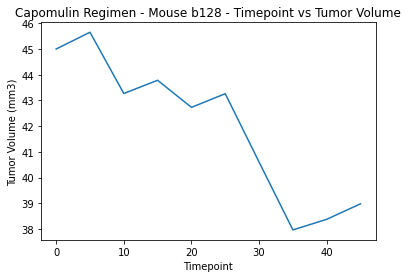

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## use loc to filter data down to a specific mouse and the treatment Capomulin
capomulin = clean_df[clean_df['Mouse ID'].isin(['b128'])]
capomulin #prints dataframe for data for mouse 'b128'

#create x and y axis values
x_axis = capomulin['Timepoint']
y_axis = capomulin['Tumor Volume (mm3)']

#name graph axis labels 
plt.title("Capomulin Regimen - Mouse b128 - Timepoint vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

#plot line plot
plt.plot(x_axis, y_axis)
plt.show()


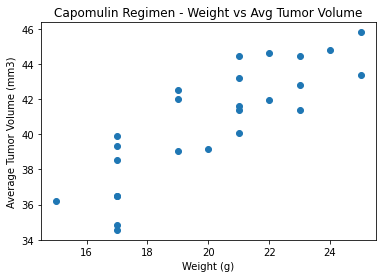

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
## same loc as above but second data point is an Average (.mean) from the filtered data.
capomulin = clean_df[clean_df['Drug Regimen'].isin(['Capomulin'])]
capomulin #prints dataframe for all mice treated with Capomulin

#create x and y axis values
weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
tumor = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#name graph axis labels 
plt.title("Capomulin Regimen - Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plot scatter plot
plt.scatter(weight, tumor)
plt.show()

# Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
## matplotlib day 3 activity 6+

capomulin = clean_df[clean_df['Drug Regimen'].isin(['Capomulin'])] #copied from above
capomulin #prints dataframe for all mice treated with Capomulin



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


The correlation between both factors is 0.84


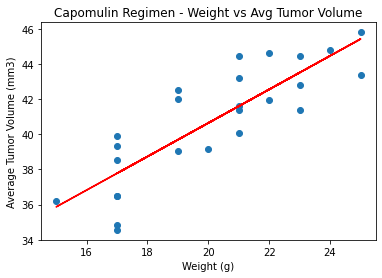

In [101]:
#dependency for linear regression
from scipy.stats import linregress

#create x and y axis values
weight_x = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
tumor_y = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Pearson correlation coefficient 
correlation = st.pearsonr(weight_x,tumor_y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_x, tumor_y)
regress_values = weight_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#name graph axis labels
plt.title("Capomulin Regimen - Weight vs Avg Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#plot scatter plot with linear regression
plt.scatter(weight_x,tumor_y)
plt.plot(weight_x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()

